# Identification
Please indicate your name and parcours (e.g.: IMA, DIGIT, BIM, DAC, ..., Erasmus)

Student 1: Graham PRESTON

Student 2: Anton VAN CLEMMPUT

# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

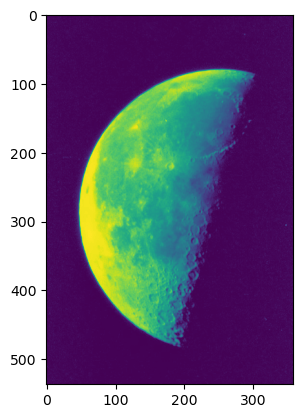

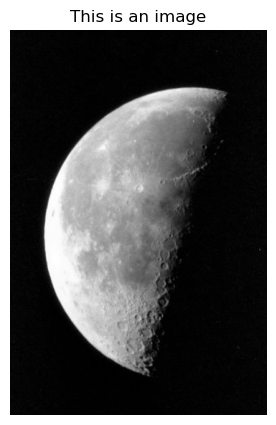

In [12]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html

## Exercise 1
In this exercise, we work with image `img/moon.png`. If possible give two solutions: one with loops (for, while, ...) and one without loops using Numpy arithmetic avoiding ad-hoc Numpy functions such as `np.where()`. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [49]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    im = Image.open(fname)
    pix = im.load()
    return list(im.getdata())

moon = openImage('img/moon.png')
print(moon)
assert all(map(lambda v: isinstance(v, int) and v >= 0 and v < 256))

[1, 3, 7, 5, 2, 3, 4, 5, 9, 6, 2, 6, 5, 3, 3, 3, 2, 2, 2, 1, 3, 4, 2, 2, 4, 2, 1, 3, 3, 5, 1, 3, 2, 2, 3, 3, 4, 5, 6, 5, 3, 2, 3, 3, 2, 2, 1, 4, 9, 8, 4, 2, 3, 3, 3, 3, 1, 2, 4, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 6, 2, 2, 1, 2, 2, 2, 4, 1, 0, 1, 1, 2, 2, 4, 2, 0, 0, 1, 1, 2, 2, 2, 6, 4, 1, 1, 2, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 2, 3, 2, 2, 3, 4, 5, 3, 2, 7, 6, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 5, 5, 1, 2, 4, 4, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 1, 2, 2, 3, 4, 2, 1, 2, 2, 1, 2, 3, 3, 2, 2, 1, 2, 3, 2, 3, 2, 4, 6, 1, 1, 3, 4, 2, 1, 3, 4, 2, 7, 9, 2, 2, 1, 2, 5, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 2, 3, 1, 2, 2, 1, 2, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 5, 4, 5, 4, 7, 4, 4, 4, 4, 4, 2, 1, 2, 3, 4, 8, 2, 3, 8, 3, 3, 5, 2, 3, 2, 1, 2, 1, 3, 2, 2, 4, 5, 8, 4, 2, 2, 3, 3, 11, 5, 7, 9, 6, 3, 2, 2,

TypeError: map() must have at least two arguments.

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [14]:
def countPixels(I,k):
    """ Array*int -> int"""
    return len([v for v in I if v == k])

print(countPixels(moon, 0))
assert countPixels(moon, 100) > 0
assert countPixels(moon, 256) == 0

1459


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [51]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    return [k2 if v == k1 else v for v in I]

replaced = replacePixels(moon, 0, 255)
print(replaced)
assert 0 not in replaced

[1, 3, 7, 5, 2, 3, 4, 5, 9, 6, 2, 6, 5, 3, 3, 3, 2, 2, 2, 1, 3, 4, 2, 2, 4, 2, 1, 3, 3, 5, 1, 3, 2, 2, 3, 3, 4, 5, 6, 5, 3, 2, 3, 3, 2, 2, 1, 4, 9, 8, 4, 2, 3, 3, 3, 3, 1, 2, 4, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 6, 2, 2, 1, 2, 2, 2, 4, 1, 255, 1, 1, 2, 2, 4, 2, 255, 255, 1, 1, 2, 2, 2, 6, 4, 1, 1, 2, 3, 2, 1, 1, 255, 255, 255, 255, 255, 255, 255, 1, 255, 1, 2, 1, 255, 255, 1, 2, 2, 1, 255, 1, 2, 2, 3, 2, 2, 3, 4, 5, 3, 2, 7, 6, 1, 1, 1, 1, 1, 1, 255, 1, 1, 1, 2, 2, 1, 1, 1, 5, 5, 1, 2, 4, 4, 2, 1, 1, 1, 1, 1, 2, 1, 255, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 255, 2, 2, 255, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 1, 2, 2, 3, 4, 2, 1, 2, 2, 1, 2, 3, 3, 2, 2, 1, 2, 3, 2, 3, 2, 4, 6, 1, 1, 3, 4, 2, 1, 3, 4, 2, 7, 9, 2, 2, 1, 2, 5, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 2, 3, 1, 2, 2, 1, 2, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 5, 4, 5, 4, 7, 4, 4, 4, 4, 4, 2, 1, 2, 3, 4, 8, 2, 3, 8, 3, 3, 5, 2, 3, 2, 1, 2, 1, 3, 2, 2, 4, 5, 8, 4, 

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [52]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    k_min = min(I)
    k_max = max(I)
    normalize_f = lambda k: k1 + (((k2 - k1) / (k_max - k_min)) * (k - k_min))
    return [normalize_f(v) for v in I]

norm = normalizeImage(moon, 10, 50)
print(norm)
assert all(map(lambda v: v >= 10 and v <= 50, norm))

[10.15810276679842, 10.474308300395258, 11.106719367588934, 10.790513833992096, 10.316205533596838, 10.474308300395258, 10.632411067193676, 10.790513833992096, 11.422924901185771, 10.948616600790514, 10.316205533596838, 10.948616600790514, 10.790513833992096, 10.474308300395258, 10.474308300395258, 10.474308300395258, 10.316205533596838, 10.316205533596838, 10.316205533596838, 10.15810276679842, 10.474308300395258, 10.632411067193676, 10.316205533596838, 10.316205533596838, 10.632411067193676, 10.316205533596838, 10.15810276679842, 10.474308300395258, 10.474308300395258, 10.790513833992096, 10.15810276679842, 10.474308300395258, 10.316205533596838, 10.316205533596838, 10.474308300395258, 10.474308300395258, 10.632411067193676, 10.790513833992096, 10.948616600790514, 10.790513833992096, 10.474308300395258, 10.316205533596838, 10.474308300395258, 10.474308300395258, 10.316205533596838, 10.316205533596838, 10.15810276679842, 10.632411067193676, 11.422924901185771, 11.264822134387352, 10.6

5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [53]:
def inverteImage(I):
    """ Array -> Array """
    k_max = max(I)
    return [k_max - v for v in I]

inverted = inverteImage(moon)
print(inverted)
assert all(map(lambda v: v >= 0 and v <= 255, inverted))

[252, 250, 246, 248, 251, 250, 249, 248, 244, 247, 251, 247, 248, 250, 250, 250, 251, 251, 251, 252, 250, 249, 251, 251, 249, 251, 252, 250, 250, 248, 252, 250, 251, 251, 250, 250, 249, 248, 247, 248, 250, 251, 250, 250, 251, 251, 252, 249, 244, 245, 249, 251, 250, 250, 250, 250, 252, 251, 249, 250, 251, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 252, 252, 251, 252, 250, 247, 251, 251, 252, 251, 251, 251, 249, 252, 253, 252, 252, 251, 251, 249, 251, 253, 253, 252, 252, 251, 251, 251, 247, 249, 252, 252, 251, 250, 251, 252, 252, 253, 253, 253, 253, 253, 253, 253, 252, 253, 252, 251, 252, 253, 253, 252, 251, 251, 252, 253, 252, 251, 251, 250, 251, 251, 250, 249, 248, 250, 251, 246, 247, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 251, 251, 252, 252, 252, 248, 248, 252, 251, 249, 249, 251, 252, 252, 252, 252, 252, 251, 252, 253, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 251, 252, 252, 252, 252, 252, 252, 252, 252, 251, 252, 253, 251,

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [58]:
def computeHistogram(I):
    """ Array -> list[int] """
    histogram = [0] * 256

    for v in I:
        histogram[round(v)] += 1

    return histogram

h = computeHistogram(moon)
print(h)
assert len(h) == 256
    
# It is not possible. Any algorithm to count pixel values will need to visit
# each pixel at least once in some way.

[1459, 20126, 30924, 25408, 17167, 11368, 7369, 4767, 3213, 2178, 1486, 993, 632, 488, 371, 301, 255, 217, 201, 202, 190, 165, 168, 140, 160, 157, 129, 136, 140, 135, 137, 121, 137, 114, 127, 129, 115, 132, 123, 124, 101, 91, 122, 116, 129, 109, 108, 116, 113, 123, 109, 140, 101, 109, 114, 117, 140, 127, 140, 142, 129, 134, 192, 160, 179, 165, 170, 154, 155, 159, 164, 184, 166, 180, 169, 132, 153, 171, 165, 156, 166, 142, 151, 179, 159, 154, 167, 166, 179, 163, 195, 198, 181, 216, 230, 231, 250, 256, 264, 291, 245, 242, 279, 247, 261, 304, 287, 286, 296, 286, 292, 296, 285, 312, 274, 312, 282, 308, 296, 267, 273, 304, 327, 263, 286, 282, 272, 246, 238, 227, 243, 225, 239, 233, 242, 248, 258, 262, 263, 309, 338, 336, 324, 318, 335, 326, 327, 316, 314, 293, 313, 328, 292, 300, 296, 326, 341, 312, 336, 326, 362, 357, 384, 382, 414, 442, 420, 483, 448, 499, 448, 499, 468, 486, 498, 519, 551, 524, 543, 544, 527, 504, 497, 519, 521, 539, 538, 501, 536, 550, 503, 514, 557, 541, 480, 495, 484,

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [55]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    return [0 if v < s else v for v in I]

thresh = thresholdImage(moon, 5)
print(thresh)
assert all(map(lambda v: v == 0 or v >= 5, thresh))

[0, 0, 7, 5, 0, 0, 0, 5, 9, 6, 0, 6, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 6, 5, 0, 0, 0, 0, 0, 0, 0, 0, 9, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 7, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 9, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 8, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 8, 0, 0, 0, 0, 0, 11, 5, 7, 9, 6, 0, 0, 0,

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

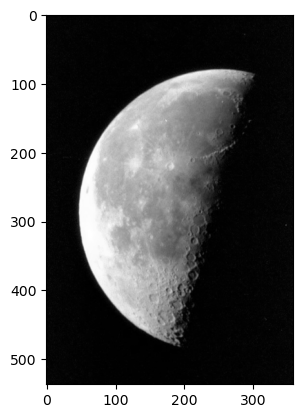

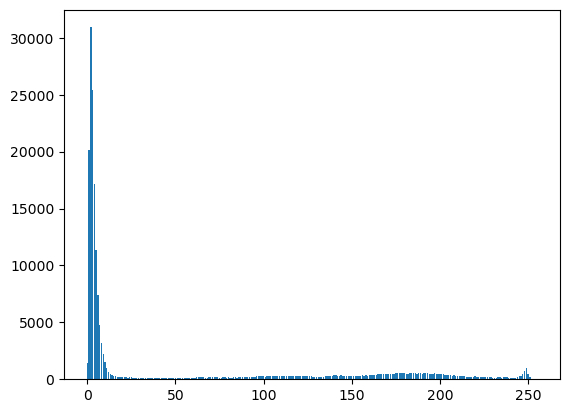

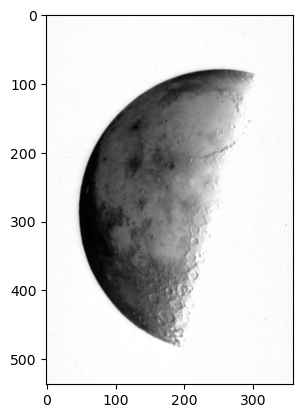

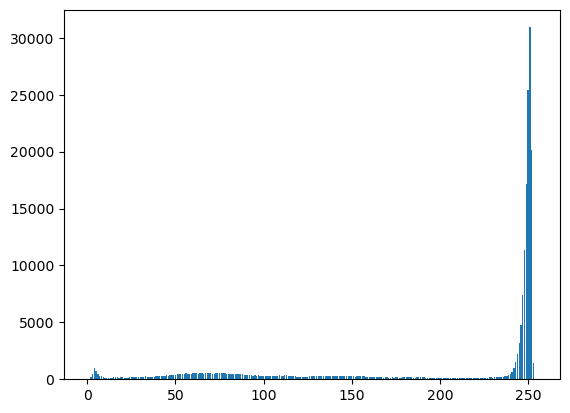

In [56]:
import matplotlib.pyplot as plt

def display_image(I, N, M):
    """Array*int, int, int"""
    shaped = np.reshape(I, (N, M))
    plt.figure()
    plt.imshow(shaped, cmap='gray')

def display_histogram(histogram):
    plt.figure()
    plt.bar(range(256), histogram)


moon_im = Image.open('img/moon.png')
moon_m, moon_n = moon_im.size

# 1.
display_image(moon, moon_n, moon_m)

# 2.
histogram = computeHistogram(moon)
display_histogram(histogram)

# 3.
inversed_moon = inverteImage(moon)
display_image(inversed_moon, moon_n, moon_m)

# 4. 
inversed_histogram = computeHistogram(inversed_moon)
display_histogram(inversed_histogram)

plt.show() 

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

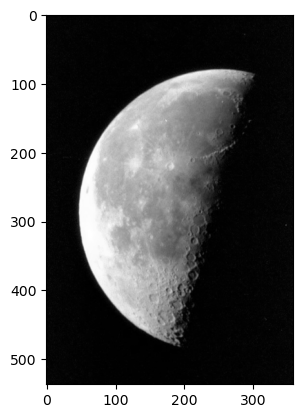

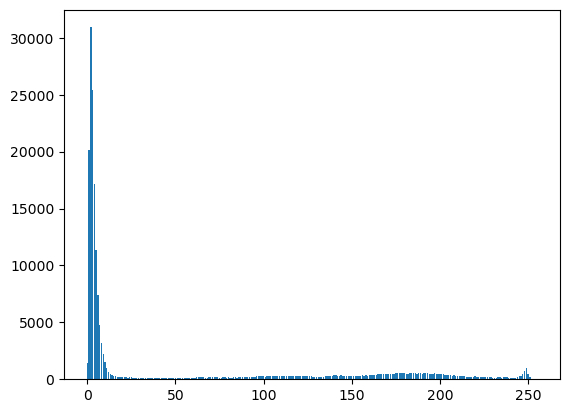

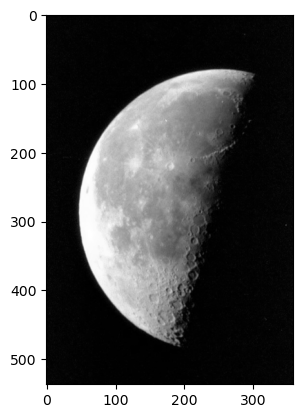

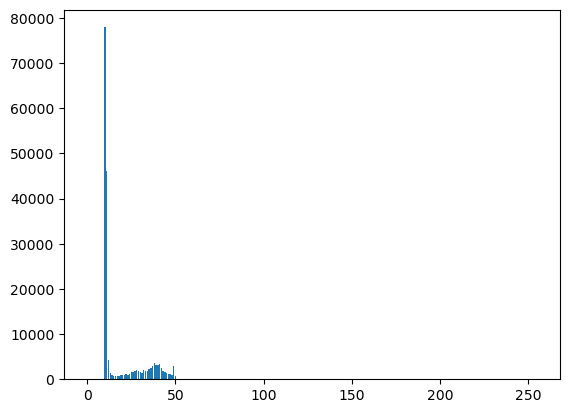

In [59]:
def read_hist_normalize_and_display(fname):
    # read and display an image
    I = openImage(fname)
    M, N = Image.open(fname).size
    display_image(I, N, M)

    # plot the histogram
    h = computeHistogram(I)
    display_histogram(h)

    # normalize the image to the interval [10, 50]
    normalized_I = normalizeImage(I, 10, 50)
    # print(normalized_I)

    # compute the new histogram, display the image and the histogram
    display_image(normalized_I, N, M)
    normalized_h = computeHistogram(normalized_I)
    display_histogram(normalized_h)
    

read_hist_normalize_and_display('img/moon.png')

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

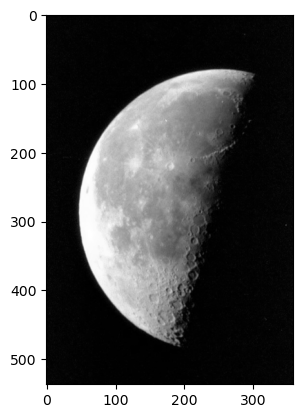

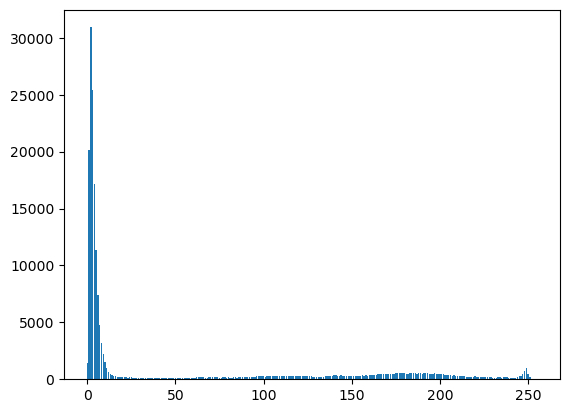

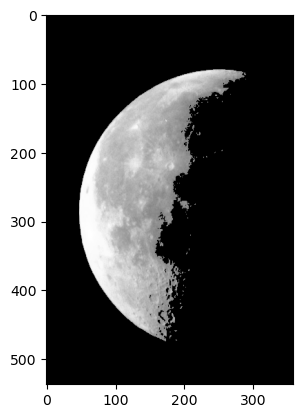

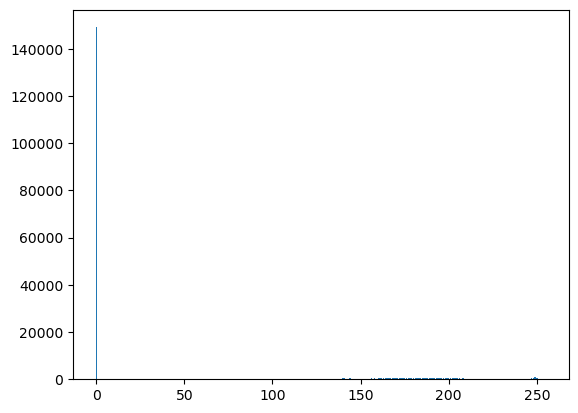

In [60]:
def read_hist_threshold_and_display(fname):
    # read and display an image
    I = openImage(fname)
    M, N = Image.open(fname).size
    display_image(I, N, M)

    # plot the histogram
    h = computeHistogram(I)
    display_histogram(h)

    # thresholding with parameter s = 127
    normalized_I = thresholdImage(I, 127)

    # compute the new histogram, display the image and the histogram
    display_image(normalized_I, N, M)
    normalized_h = computeHistogram(normalized_I)
    display_histogram(normalized_h)
    

read_hist_threshold_and_display('img/moon.png')

## Exercise 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 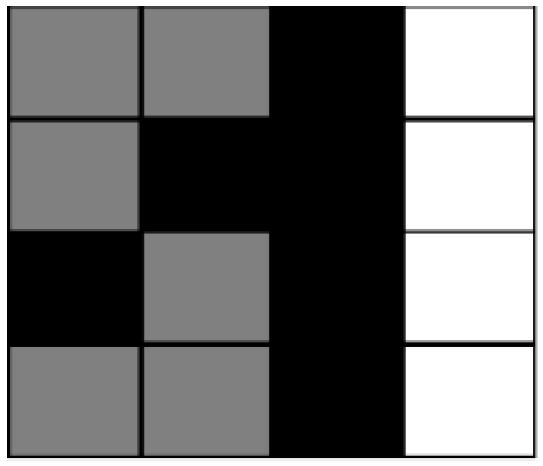 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

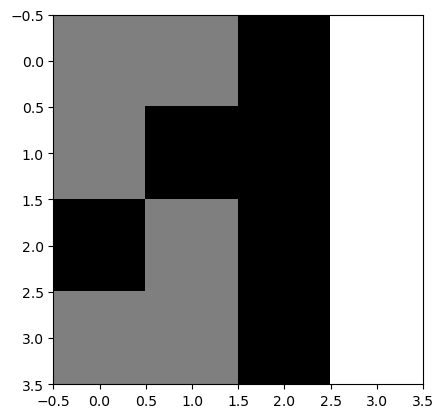

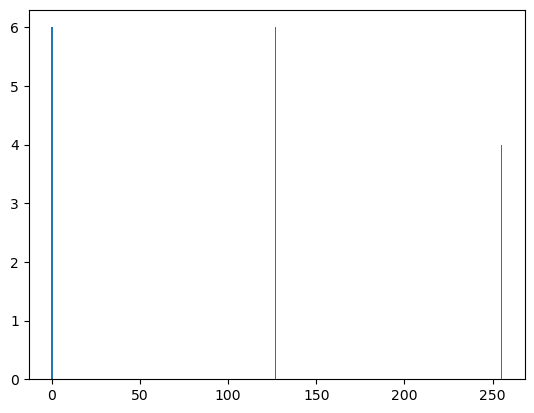

In [61]:
I = np.array([
    [127, 127, 0, 255],
    [127, 0, 0, 255],
    [0, 127, 0, 255],
    [127, 127, 0, 255]
])

plt.figure()
plt.imshow(I)

h = computeHistogram(np.reshape(I, (16,)))
display_histogram(h)

2. We want to generate an image having random values. Functions `rand()` and `randn()` from  `numpy.random` module generate an array of given shapes with random values following a uniform distribution on $[0,1[$ and a normal distribution respectively. Create an array of shape 512 by 512 having **integer** elements following a uniform distribution in the set $\{0,1,\cdots,255\}$. We also want to create an array following a Gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histograms. Discuss the results.

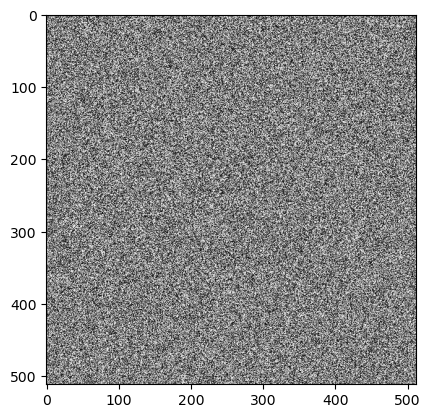

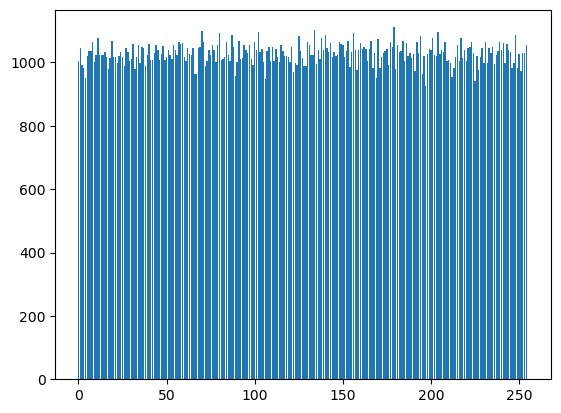

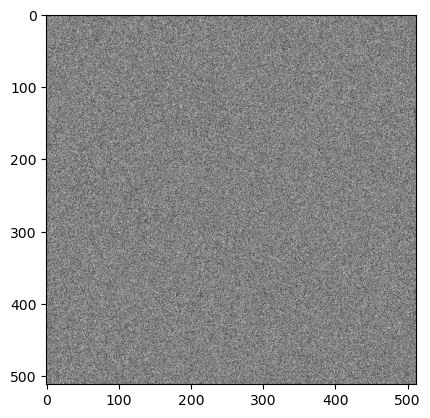

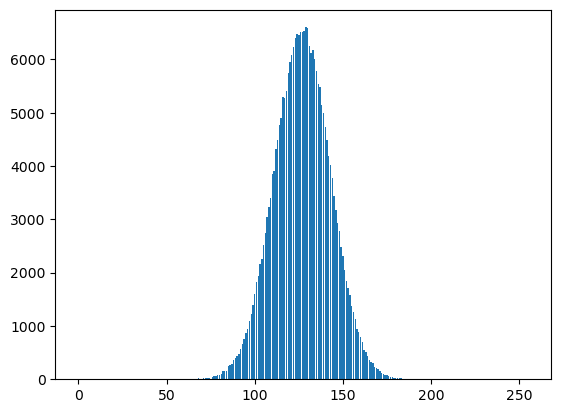

In [62]:
from numpy.random import rand, randn

def display_random_image_and_histogram(rand_f):
    I = rand_f(512, 512)
    I = np.floor(I * 255).astype(int)
    flat_I = np.reshape(I, (512*512,))
    
    display_image(flat_I, 512, 512)
    h = computeHistogram(flat_I)
    display_histogram(h)

display_random_image_and_histogram(rand)
display_random_image_and_histogram(lambda n, m: 0.5 + 0.0625 * randn(n, m))

# The normal distribution random image is much "softer", due to more grays closer to the middle.
# This follows what occurs with the normal distribution, where very low and very high values are
# less likely to occur.

## Exercise 3: image manipulation
In this exercise, we work with image `img/pout.png`. 

1. Read and display this image

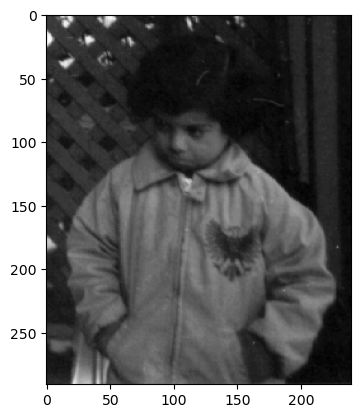

In [63]:
I = openImage('img/pout.png')
M, N = Image.open('img/pout.png').size
display_image(I, N, M)

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

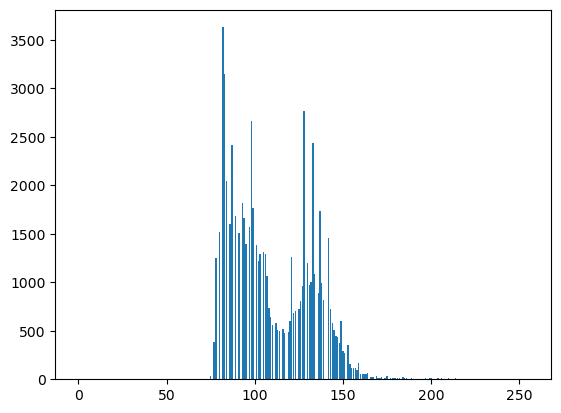

In [65]:
h = computeHistogram(I)
display_histogram(h)

# The breadth of range is narrow. Not much difference in color can make details
# harder to make out in the picture.
# There are also some gaps in values. This can tell us that the range could have
# been stretched, or that generally a solid range of colors was not captured.

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

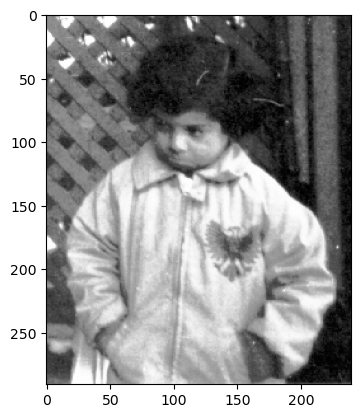

In [66]:
def cumulative_histogram(I):
    histogram = computeHistogram(I)
    current_total = 0
    hc = []

    for count in histogram:
        current_total += count
        hc.append(current_total)

    return hc

def histogramEqualization(I):
    """ Array * (list[int] -> Array """
    eq_I = []
    hc = cumulative_histogram(I)

    for k in I:
        eq_I.append(int((255 / (N * M)) * hc[k]))

    return eq_I

eq_I = histogramEqualization(I)
display_image(eq_I, N, M)

# The result is brighter, due to spreading values over the previously mostly empty
# low end of the range. The image is not necessarily higher quality though, as it
# still has the problem of missing colors, which is perhaps even more pronounced
# now due to a larger spreading of the values. The brightness, however, does make it
# easier to pick out some details.